#Kelompok Machine Learning
1. Gau Kurniawi Syam (H071201084)
2. Rahmaliyah Kadir (H071201093)
3. Adi Indra (H071201095)
4. Muhammad Ghazy Alghifary (H071201098)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Mengimpor Kumpulan library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#K-nearest neighbors (KNN) Classification

In [29]:
# Mengimpor dataset dan mengirisnya menjadi variabel independen dan dependen
dt = pd.read_csv('/content/drive/MyDrive/Machine Learning/MID/transfusion.csv')
#memastikan bahwa import data telah benar
dt.head()

,Recency_(months),Frequency_(times),Monetary_(c.c. blood),Time_(months),whether_he/she_donated_blood_in_March_2007
0,2,50,12500,98,whether he/she donated blood in March 2008
1,0,13,3250,28,whether he/she donated blood in March 2009
2,1,16,4000,35,whether he/she donated blood in March 2010
3,2,20,5000,45,whether he/she donated blood in March 2011
4,1,24,6000,77,whether he/she donated blood in March 2012


_**Classiffication**_

In [30]:
X = dt.iloc[:, [1, 2, 3]].values
y = dt.iloc[:, -1].values

In [31]:
# Karena dataset berisi variabel karakter, maka harus menyandikannya menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [32]:
# Memisahkan dataset ke dalam set Pelatihan dan set Tes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
# Penskalaan Fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Menggunakan 3 parameter dalam pembuatan model. n_neighbors diatur sebagai 5, yang berarti 5 titik lingkungan diperlukan untuk mengklasifikasikan titik tertentu. Metrik jarak yang digunakan adalah Minkowski. 

Sesuai persamaan, kita harus memilih nilai p juga.
- p = 1 , Jarak Manhattan
- p = 2 , Jarak Euclidean
- p = tak terhingga , Jarak Cheybchev

Memilih p sebagai 2 (juga dapat memilih metrik sebagai "euclidean") Model dibuat, sekarang harus memprediksi output untuk set tes

In [34]:
# Melatih model K-NN pada set Pelatihan
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Memprediksi hasil set Tes
y_pred = classifier.predict(X_test)

Membandingkan nilai benar dan nilai prediksi :

In [36]:
y_test

array(['whether he/she donated blood in March 2266',
       'whether he/she donated blood in March 2529',
       'whether he/she donated blood in March 2022',
       'whether he/she donated blood in March 2039',
       'whether he/she donated blood in March 2513',
       'whether he/she donated blood in March 2087',
       'whether he/she donated blood in March 2390',
       'whether he/she donated blood in March 2083',
       'whether he/she donated blood in March 2479',
       'whether he/she donated blood in March 2035',
       'whether he/she donated blood in March 2650',
       'whether he/she donated blood in March 2375',
       'whether he/she donated blood in March 2591',
       'whether he/she donated blood in March 2530',
       'whether he/she donated blood in March 2048',
       'whether he/she donated blood in March 2727',
       'whether he/she donated blood in March 2291',
       'whether he/she donated blood in March 2465',
       'whether he/she donated blood in March 

In [37]:
y_pred

array(['whether he/she donated blood in March 2344',
       'whether he/she donated blood in March 2059',
       'whether he/she donated blood in March 2030',
       'whether he/she donated blood in March 2020',
       'whether he/she donated blood in March 2017',
       'whether he/she donated blood in March 2082',
       'whether he/she donated blood in March 2386',
       'whether he/she donated blood in March 2082',
       'whether he/she donated blood in March 2383',
       'whether he/she donated blood in March 2015',
       'whether he/she donated blood in March 2159',
       'whether he/she donated blood in March 2190',
       'whether he/she donated blood in March 2161',
       'whether he/she donated blood in March 2015',
       'whether he/she donated blood in March 2021',
       'whether he/she donated blood in March 2397',
       'whether he/she donated blood in March 2214',
       'whether he/she donated blood in March 2461',
       'whether he/she donated blood in March 

In [38]:
# Membuat Matriks Kebingungan
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [39]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
ac

0.0

In [41]:
# Karena whether_he/she_donated_blood_in_March_2007 bukanlah ukuran fisik semata, sebaiknya hapus dari dataset. Bisa di hapus kolom whether_he/she_donated_blood_in_March_2007 menggunakan .drop:
dt = dt.drop("whether_he/she_donated_blood_in_March_2007", axis=1)

**Statistik Deskriptif Dari Frequency_(times) Dataset**

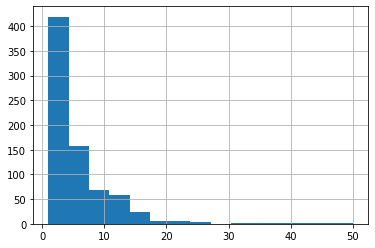

In [42]:
dt["Frequency_(times)"].hist(bins= 15)
plt.show()

In [43]:
# Dapat diamati matriks korelasi lengkap dalam korelasi_matriks.
correlation_matrix = dt.corr()
correlation_matrix["Frequency_(times)"]

Recency_(months)        -0.182745
Frequency_(times)        1.000000
Monetary_(c.c. blood)    1.000000
Time_(months)            0.634940
Name: Frequency_(times), dtype: float64

Tentukan "Nearest" Menggunakan Definisi Matematika Jarak

In [44]:
# Dapat menghitung ini dengan Python menggunakan linalg.norm() dari NumPy.
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

#Random Forests

In [45]:
dt.head()

,Recency_(months),Frequency_(times),Monetary_(c.c. blood),Time_(months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [46]:
#Mempersiapkan Data Untuk Pelatihan Kode dengan membagi data menjadi atribut dan label:
X = dt.iloc[:, 0:3].values
y = dt.iloc[:, 3].values

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

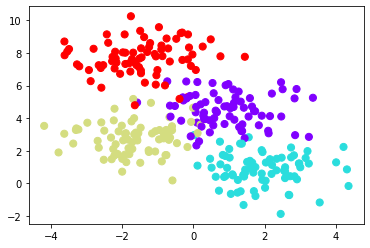

In [48]:
# Membuat klasifikasinya
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Proses pemasangan data kami ini dapat dilakukan di Scikit-Learn dengan estimator DecisionTreeClassifier:

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Fungsi utilitas cepat untuk membantu kita memvisualisasikan output dari classifier:

In [50]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot poin pelatihan
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # sesuai dengan penduga
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Buat plot warna dengan hasilnya
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Sekarang kita dapat memeriksa seperti apa klasifikasinya:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


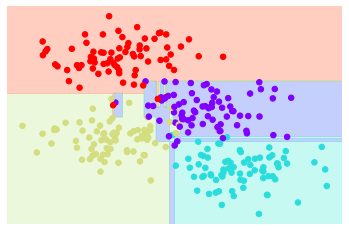

In [51]:
visualize_classifier(DecisionTreeClassifier(), X, y)

#Kesimpulan

Setelah pengujian klasifikasi pada K-Nearest Neighbor dan Random Forest selesai dilakukan, maka dapat dilihat
hasil perbandingan dari hasil pengujian kedua metode tersebut dalam melakukan peroleh akurasi klasifikasi pada data diatas. Diketahui pada bagian sebelumnya bahwa hasil akurasi yang diperoleh dari pengujian
pada kedua metode tersebut memperoleh hasil yang berbeda dan signifikan.